In [1]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime
print(datetime.datetime.now())

2020-01-14 13:26:44.489814


# Import Dataset

## Create Column names

In [4]:
service_col_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',nrows=1)
service_col_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,16369065,04/04/2010 02:13:31 AM,04/04/2010 04:17:18 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10469,1239 EAST 222 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.88039,-73.846248,"(40.880390142379426, -73.84624837299413)"


In [13]:
def test_query_db(query):
    '''
    Runs sql query on 311 database and returns a pandas DataFrame.
    Redshift is a data warehouse based on PostgreSQL, so syntax is mostly the
    same
    '''
    host = 'interview-ds.ckgnwnm6pw4o.us-east-1.redshift.amazonaws.com'
    port = 5439
    db = 'interview'
    username = 'dsguest'
    password = 'nX9EFYUZ5Yu#0q'
    conn = psycopg2.connect(host=host, port=port, dbname=db, user=username,
    password=password)
    cur = conn.cursor()
    cur.execute(query)
    colnames = [desc[0] for desc in cur.description]
    rows = cur.fetchall()
    rows = pd.DataFrame(data=rows, columns=colnames)
    return rows

In [6]:
def query_db(query):
    '''
    Runs sql query on 311 database and returns a pandas DataFrame.
    Redshift is a data warehouse based on PostgreSQL, so syntax is mostly the
    same
    '''
    host = 'interview-ds.ckgnwnm6pw4o.us-east-1.redshift.amazonaws.com'
    port = 5439
    db = 'interview'
    username = 'dsguest'
    password = 'nX9EFYUZ5Yu#0q'
    conn = psycopg2.connect(host=host, port=port, dbname=db, user=username,
    password=password)
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    rows = pd.DataFrame(data=rows,columns=service_col_df.columns.values)
    return rows
# Example usage:
query_db("SELECT * FROM public.three_one_one LIMIT 1;")

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15634729,2010-01-01,2010-02-04,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10019,427 WEST 51 STREET,...,,,,,,,,40.764519566787530,-73.98944090893806,"(40.76451956678753, -73.98944090893806)"


## Test SQL year

In [38]:
test_query_db("SELECT EXTRACT(YEAR FROM created_date) FROM public.three_one_one LIMIT 1;")

,date_part
0,2010


# Analyze 2010 Dataset

In [7]:
print(datetime.datetime.now())
#2010 dataset
service_2010_df = query_db("SELECT * FROM public.three_one_one WHERE extract(year FROM created_date)=2010;")
print(datetime.datetime.now())
service_2010_df

2020-01-11 15:08:01.036691
2020-01-11 15:10:03.666880


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15630431,2010-01-01 00:00:00,2010-01-02 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,...,,,,,,,,40.651236116198410,-73.95829303562495,"(40.65123611619841, -73.95829303562495)"
1,15631513,2010-01-01 00:00:00,2010-01-02 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11210.0,3103 FOSTER AVENUE,...,,,,,,,,40.638696009475986,-73.94694738144321,"(40.638696009475986, -73.94694738144321)"
2,15631565,2010-01-01 00:00:00,2010-01-05 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11213.0,1510 CARROLL STREET,...,,,,,,,,40.666482499576020,-73.93807588830035,"(40.66648249957602, -73.93807588830035)"
3,15631756,2010-01-01 00:00:00,2010-01-16 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,...,,,,,,,,40.764035126914010,-73.92593527491938,"(40.76403512691401, -73.92593527491938)"
4,15634730,2010-01-01 00:00:00,2010-01-27 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10463.0,3451 GILES PLACE,...,,,,,,,,40.881305776957504,-73.89710576823687,"(40.881305776957504, -73.89710576823687)"
5,15634731,2010-01-01 00:00:00,2010-01-13 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10456.0,1214 SHERIDAN AVENUE,...,,,,,,,,40.834452787215696,-73.91632383462321,"(40.834452787215696, -73.91632383462321)"
6,15634742,2010-01-01 00:00:00,2010-01-16 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,10458.0,116 EAST MOSHOLU PARKWAY SOUTH,...,,,,,,,,40.876179504378044,-73.88352111658833,"(40.876179504378044, -73.88352111658833)"
7,15634746,2010-01-01 00:00:00,2010-02-04 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10019.0,427 WEST 51 STREET,...,,,,,,,,40.764519566787530,-73.98944090893806,"(40.76451956678753, -73.98944090893806)"
8,15634753,2010-01-01 00:00:00,2010-01-05 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10456.0,1384 BOSTON ROAD,...,,,,,,,,40.832596498371950,-73.89818568967601,"(40.83259649837195, -73.89818568967601)"
9,15634756,2010-01-01 00:00:00,2010-01-08 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11219.0,5017 13 AVENUE,...,,,,,,,,40.634313621135490,-73.99284463630684,"(40.63431362113549, -73.99284463630684)"


In [8]:
service_2010_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15630431,2010-01-01,2010-01-02,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,...,,,,,,,,40.651236116198410,-73.95829303562495,"(40.65123611619841, -73.95829303562495)"
1,15631513,2010-01-01,2010-01-02,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11210.0,3103 FOSTER AVENUE,...,,,,,,,,40.638696009475986,-73.94694738144321,"(40.638696009475986, -73.94694738144321)"
2,15631565,2010-01-01,2010-01-05,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11213.0,1510 CARROLL STREET,...,,,,,,,,40.666482499576020,-73.93807588830035,"(40.66648249957602, -73.93807588830035)"
3,15631756,2010-01-01,2010-01-16,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-LEAKS,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,...,,,,,,,,40.764035126914010,-73.92593527491938,"(40.76403512691401, -73.92593527491938)"
4,15634730,2010-01-01,2010-01-27,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,RESIDENTIAL BUILDING,10463.0,3451 GILES PLACE,...,,,,,,,,40.881305776957504,-73.89710576823687,"(40.881305776957504, -73.89710576823687)"


## Show NaNs

### Parking/Taxi

In [9]:
service_2010_df.isna().sum()

Unique Key                              0
Created Date                            0
Closed Date                         58530
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                              0
Location Type                           0
Incident Zip                       138649
Incident Address                        0
Street Name                             0
Cross Street 1                          0
Cross Street 2                          0
Intersection Street 1                   0
Intersection Street 2                   0
Address Type                            0
City                                    0
Landmark                                0
Facility Type                           0
Status                                  0
Due Date                          1327231
Resolution Description                  0
Resolution Action Updated Date      31648
Community Board                   

In [10]:
na_col = ['Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',
          'Bridge Highway Direction','Road Ramp','Bridge Highway Segment']
service_2010_df[na_col].head()

,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment
0,,,,,,,
1,,,,,,,
2,,,,,,,
3,,,,,,,
4,,,,,,,


In [12]:
service_2010_df['Vehicle Type'].value_counts()

                           2029899
Car Service                   1726
Ambulette / Paratransit        121
Commuter Van                    67
Name: Vehicle Type, dtype: int64

In [13]:
service_2010_df['Taxi Company Borough'].value_counts()

                 2030163
BROOKLYN             537
QUEENS               391
MANHATTAN            337
BRONX                323
STATEN ISLAND         62
Name: Taxi Company Borough, dtype: int64

In [14]:
service_2010_df['Bridge Highway Name'].value_counts()

                                     2025957
Belt Pkwy                                913
Van Wyck Expwy                           749
BQE/Gowanus Expwy                        615
Long Island Expwy                        376
Queensboro/59th St Br                    344
FDR Dr                                   329
Grand Central Pkwy                       321
Major Deegan Expwy                       209
Cross Island Pkwy                        195
Staten Island Expwy                      153
Henry Hudson Pkwy/Rt 9A                  139
Cross Bronx Expwy                        137
Brooklyn Br                              129
West Shore Expwy                          98
Clearview Expwy                           98
Williamsburg Br                           97
Harlem River Dr                           86
Bronx River Pkwy                          82
Whitestone Expwy                          78
Bruckner Expwy                            71
Jackie Robinson/Interboro Pkwy            69
Hutchinson

In [15]:
service_2010_df['Bridge Highway Direction'].value_counts()

                                  2025958
North/Bronx Bound                     665
West/Staten Island Bound              605
East/Queens Bound                     427
East/Long Island Bound                401
South/JFK Airport Bound               377
Manhattan Bound                       374
West/Brooklyn Bound                   373
Queens Bound                          213
West/Toward Triborough Br             195
West/Manhattan Bound                  171
Northbound/Uptown                     166
Southbound/Downtown                   163
North/Westchester County Bound        154
Brooklyn Bound                        138
Southbound                            134
South/Toward Triborough Br            124
South/Long Island Bound               106
Northbound                            100
East/Brooklyn Bound                    91
South/Downtown                         90
North/Westbound (To GW Br)             83
East/Bronx Bound                       64
Westbound/To Goethals Br          

In [16]:
service_2010_df['Road Ramp'].value_counts()

           2025962
Roadway       4611
Ramp          1189
N/A             51
Name: Road Ramp, dtype: int64

In [17]:
service_2010_df['Bridge Highway Segment'].value_counts()

                                                                              2025976
Ramp                                                                              327
Roadway                                                                           297
Lower Level                                                                       153
Rockaway Pkwy (Exit 13) - Flatbush Ave (Exit 11N)                                 133
Flatbush Ave (Exit 11N) - Flatbush Ave (Exit 11S)                                 107
Linden Blvd (Exit 3) - Rockaway Blvd (Exit 2)                                      62
East 96th St (Exit 14) - Triborough Br (Exit 17)                                   60
N/A                                                                                59
Linden Blvd (Exit 3) - Liberty Ave (Exit 4)                                        57
Belt Pkwy (1 E-W) - Rockaway Blvd (Exit 2)                                         51
Rockaway Blvd (Exit 2) - Linden Blvd (Exit 3)         

In [20]:
temp = service_2010_df[service_2010_df['Bridge Highway Segment']=='Ramp']
temp['Complaint Type'].unique()

array(['Bridge Condition', 'Taxi Complaint', 'For Hire Vehicle Complaint',
       'Homeless Encampment'], dtype=object)

In [21]:
temp = service_2010_df[service_2010_df['Vehicle Type']=='Car Service']
temp['Complaint Type'].unique()

array(['For Hire Vehicle Complaint'], dtype=object)

In [22]:
temp = service_2010_df[service_2010_df['Vehicle Type']=='Ambulette / Paratransit']
temp['Complaint Type'].unique()

array(['For Hire Vehicle Complaint'], dtype=object)

In [23]:
# service_2010_df = service_2010_df.drop(na_col, axis=1)
# service_2010_df.head()

### Lat & Long NaNs

In [24]:
df = service_2010_df[service_2010_df['Latitude'].isna()]
df['Complaint Type'].value_counts()

Street Light Condition                       51174
Traffic Signal Condition                     24863
DHS Advantage - Tenant                       22548
DHS Advantage -Landlord/Broker               14637
DOF Parking - Payment Issue                  13529
DOF Property - Owner Issue                   11435
SCRIE                                         9968
DOF Property - Request Copy                   8154
HPD Literature Request                        7720
DCA / DOH New License Application Request     5894
Maintenance or Facility                       5524
DOF Property - Payment Issue                  5504
DOF Property - Reduction Issue                5188
General Construction/Plumbing                 5154
Street Condition                              4471
Housing - Low Income Senior                   3880
Water System                                  3869
Housing Options                               2733
Sewer                                         2005
DOF Parking - Request Copy     

In [25]:
temp = df[df['Complaint Type']=='Street Light Condition']
temp['Latitude'].unique()

array([None], dtype=object)

### Other Columns

In [26]:
service_2010_df['Park Borough'].value_counts()

Unspecified      711125
BROOKLYN         383526
QUEENS           380844
MANHATTAN        267492
BRONX            198900
STATEN ISLAND     89926
Name: Park Borough, dtype: int64

In [27]:
service_2010_df['Park Facility Name'].value_counts()

Unspecified                                                 2019720
Central Park                                                    591
Riverside Park                                                  248
Prospect Park                                                   166
Beach - Brighton                                                157
Rockaway Beach Boardwalk                                        149
Flushing Meadows Corona Park                                    113
Morningside Park                                                 95
Van Cortlandt Park                                               88
Marine Park                                                      84
Tompkins Square Park                                             75
Sunset Park                                                      68
Forest Park                                                      66
Juniper Valley Park                                              58
Union Square Park                               

In [28]:
service_2010_df['Descriptor'].value_counts()

HEAT                                                           211727
Loud Music/Party                                               103901
Street Light Out                                                80069
Pothole                                                         55798
VERMIN                                                          50033
CEILING                                                         46157
WATER-LEAKS                                                     44463
WALLS                                                           43693
No Access                                                       39338
Banging/Pounding                                                33091
Controller                                                      29811
FLOOR                                                           25759
WINDOWS                                                         25137
MOLD                                                            24072
Driver Complaint    

In [29]:
service_2010_df['Status'].value_counts()

Closed              1916172
Pending               64393
Open                  32195
Assigned              18837
Started                 195
Closed - Testing          9
Unspecified               6
Unassigned                5
Draft                     1
Name: Status, dtype: int64

In [35]:
service_2010_df['Address Type'].value_counts()

ADDRESS         1537075
INTERSECTION     355823
                  77056
BLOCKFACE         59865
PLACENAME          1994
Name: Address Type, dtype: int64

In [37]:
service_2010_df['Facility Type'].value_counts()

N/A                1684195
Precinct            286087
DSNY Garage          58569
School                1966
School District        956
                        40
Name: Facility Type, dtype: int64

In [38]:
service_2010_df['Resolution Description'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                          526461
The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.                                                                                                                                                                                                                      189604
Service Request status for this request is available on the Department of TransportationÃ¢Â€Â™s website. Please click the Ã¢Â€ÂœLearn MoreÃ¢Â€Â� link below.                                                                                                          

In [40]:
service_2010_df['BBL'].nunique()

309080

### Create Feature Columns

In [30]:
useless_col = ['Unique Key', 'Created Date', 'Closed Date','Incident Address',
               'Street Name','Cross Street 1','Cross Street 2',
               'Intersection Street 1','Intersection Street 2','Status',
               'Resolution Description','Resolution Action Updated Date','Community Board',
               'Due Date','BBL','X Coordinate (State Plane)','Y Coordinate (State Plane)','Location']

In [4]:
useless_col = ['Created Date', 'Closed Date','Incident Address',
               'Intersection Street 1','Intersection Street 2','Status',
               'Resolution Description','Resolution Action Updated Date','Community Board', 'Landmark',
               'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
               'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Park Facility Name',
               'Due Date','BBL','X Coordinate (State Plane)','Y Coordinate (State Plane)','Location']

In [5]:
featurs_col = list(service_col_df.columns.values)
for x in useless_col:
    featurs_col.remove(x)
featurs_col

['Unique Key',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Address Type',
 'City',
 'Facility Type',
 'Borough',
 'Open Data Channel Type',
 'Park Borough',
 'Latitude',
 'Longitude']

# Import All Years Data

In [6]:
for x in featurs_col:
    string = x.lower()
    string = string.replace(' ','_')
    print(string, end=', ')

unique_key, agency, agency_name, complaint_type, descriptor, location_type, incident_zip, street_name, cross_street_1, cross_street_2, address_type, city, facility_type, borough, open_data_channel_type, park_borough, latitude, longitude, 

In [7]:
featurs_col.append('Year')
featurs_col.append('Month')
featurs_col.append('Day')
featurs_col.append('Dow')
len(featurs_col)

22

In [8]:
def query_db(query):
    '''
    Runs sql query on 311 database and returns a pandas DataFrame.
    Redshift is a data warehouse based on PostgreSQL, so syntax is mostly the
    same
    '''
    host = 'interview-ds.ckgnwnm6pw4o.us-east-1.redshift.amazonaws.com'
    port = 5439
    db = 'interview'
    username = 'dsguest'
    password = 'nX9EFYUZ5Yu#0q'
    conn = psycopg2.connect(host=host, port=port, dbname=db, user=username,
    password=password)
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    rows = pd.DataFrame(data=rows,columns=featurs_col)
    return rows

In [9]:
query_db("SELECT unique_key, agency, agency_name, complaint_type, descriptor, location_type, incident_zip, street_name, cross_street_1, cross_street_2, address_type, city, facility_type, borough, open_data_channel_type, park_borough, latitude, longitude, \
          EXTRACT(YEAR FROM created_date), EXTRACT(Month FROM created_date), EXTRACT(Day FROM created_date), EXTRACT(Dow FROM created_date) \
          FROM public.three_one_one LIMIT 1;")

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Street Name,Cross Street 1,Cross Street 2,...,Facility Type,Borough,Open Data Channel Type,Park Borough,Latitude,Longitude,Year,Month,Day,Dow
0,15629728,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11210,FOSTER AVENUE,NOSTRAND AVENUE,NEW YORK AVENUE,...,N/A,Unspecified,UNKNOWN,Unspecified,40.638696019448100,-73.94696900027189,2010,1,1,5


In [10]:
print(datetime.datetime.now())
service_all_df = pd.DataFrame()
for x in range(2015,2020):
    service_all_df = service_all_df.append(query_db("SELECT unique_key, agency, agency_name, complaint_type, descriptor, location_type, incident_zip, street_name, cross_street_1, cross_street_2, address_type, city, facility_type, borough, open_data_channel_type, park_borough, latitude, longitude, \
                                                     EXTRACT(YEAR FROM created_date), EXTRACT(Month FROM created_date), EXTRACT(Day FROM created_date), EXTRACT(Dow FROM created_date) \
                                                     FROM public.three_one_one WHERE extract(year FROM created_date)=%d;" % x))
    print(service_all_df.shape)
    print(datetime.datetime.now())

2020-01-13 14:39:29.902313
(2300760, 22)
2020-01-13 14:42:40.690980
(4692186, 22)
2020-01-13 14:45:38.904284
(7184155, 22)
2020-01-13 14:48:23.642672
(9932140, 22)
2020-01-13 14:52:18.326577
(11607524, 22)
2020-01-13 14:56:02.622432


## Preprocessing 

In [11]:
label_encoder_cols=['Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
                    'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type', 'City', 'Facility Type',
                    'Borough', 'Open Data Channel Type', 'Park Borough']

In [12]:
from sklearn import preprocessing

print(datetime.datetime.now())
le = preprocessing.LabelEncoder()
# le.fit(np.unique(service_all_df[label_encoder_cols].values))
service_all_df[label_encoder_cols]=service_all_df[label_encoder_cols].apply(le.fit_transform)
service_all_df.head()
print(datetime.datetime.now())

2020-01-13 14:56:03.471906
2020-01-13 15:00:33.202125


# Challenge One: Data Analysis

## How many incidents were opened in each year (beginning with 2010)? 

In [4]:
incidents_year = pd.DataFrame()
for x in range(2010,2020):
    incidents_year = incidents_year.append(test_query_db("SELECT COUNT(unique_key) FROM public.three_one_one WHERE extract(year FROM created_date)=%d;" % x))
incidents_year

,count
0,2031813
0,1961598
0,1796207
0,1839974
0,2114000
0,2300760
0,2391426
0,2491969
0,2747985
0,1675384


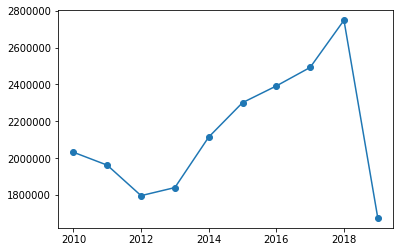

In [5]:
x = np.arange(2010,2020,1)
y = np.array(incidents_year)
plt.plot(x,y,'-o')

In [14]:
service_2019_df = query_db("SELECT unique_key, created_date, closed_date, agency, agency_name, complaint_type, descriptor, location_type, incident_zip, address_type, city, landmark, facility_type, borough, open_data_channel_type, park_facility_name, park_borough, vehicle_type, taxi_company_borough, taxi_pick_up_location, bridge_highway_name, bridge_highway_direction, road_ramp, bridge_highway_segment, latitude, longitude, \
                            EXTRACT(YEAR FROM created_date), EXTRACT(Month FROM created_date), EXTRACT(Day FROM created_date) \
                            FROM public.three_one_one WHERE extract(year FROM created_date)=%d ORDER BY created_date ASC;" % 2019)
service_2019_df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Year,Month,Day
1675379,43586836,2019-08-20 01:51:11,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10031.0,,...,,,,,,40.824103969692190,-73.95284079702623,2019,8,20
1675380,43582092,2019-08-20 01:52:04,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11373.0,,...,,,,,,40.746607936921070,-73.87187051194952,2019,8,20
1675381,43588698,2019-08-20 01:56:19,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11221.0,,...,,,,,,40.692334572326370,-73.91507059406347,2019,8,20
1675382,43587124,2019-08-20 01:58:04,NaT,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint - Passenger,,10019.0,,...,"125 WEST 53 STREET, MANHATTAN (NEW YORK), NY...",,,,,40.762163317824516,-73.97995468076914,2019,8,20
1675383,43582208,2019-08-20 01:58:42,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11221.0,,...,,,,,,40.688623389533970,-73.91472916052079,2019,8,20


## Which borough has the most incidents? 

In [129]:
sql = "SELECT borough, COUNT(*) as service_all \
       FROM public.three_one_one \
       GROUP BY borough ORDER BY COUNT(*) DESC;"
service_borough_df = test_query_db(sql)
service_borough_df

,borough,service_all
0,BROOKLYN,6342836
1,QUEENS,4865070
2,MANHATTAN,4134900
3,BRONX,3718699
4,Unspecified,1218678
5,STATEN ISLAND,1070930
6,,3


<BarContainer object of 7 artists>

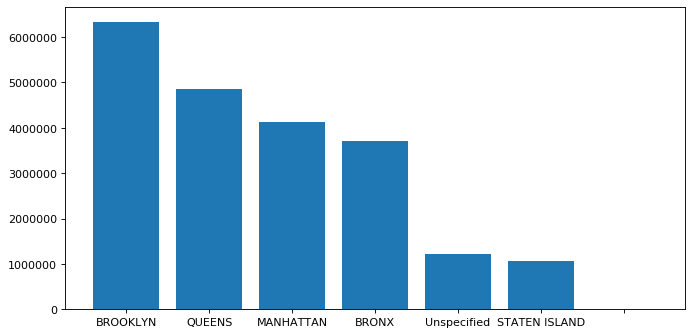

In [130]:
x = service_borough_df['borough']
y = service_borough_df['service_all']
plt.subplots(figsize=(10,5), dpi= 80) 
plt.bar(x,y)

In [131]:
for x in range(2010,2020):
    service_borough_df = service_borough_df.merge(test_query_db("SELECT borough, COUNT(*) as service_%d FROM public.three_one_one \
                                                                 WHERE extract(year FROM created_date)= %d  \
                                                                 GROUP BY borough;" % (x,x)),
                                                  on='borough', how='left')
service_borough_df = service_borough_df.fillna(0)
service_borough_df

,borough,service_all,service_2010,service_2011,service_2012,service_2013,service_2014,service_2015,service_2016,service_2017,service_2018,service_2019
0,BROOKLYN,6342836,383526.0,563803.0,557257.0,573486.0,657103.0,704973.0,725596.0,778178.0,870271,528643.0
1,QUEENS,4865070,380844.0,424628.0,417417.0,404295.0,480069.0,531704.0,538564.0,599022.0,676582,411945.0
2,MANHATTAN,4134900,267492.0,352022.0,356598.0,387033.0,435849.0,481980.0,526205.0,491243.0,520108,316370.0
3,BRONX,3718699,198900.0,336380.0,341966.0,349021.0,395612.0,416325.0,441916.0,452944.0,484556,301079.0
4,Unspecified,1218678,711125.0,184341.0,34243.0,37046.0,40115.0,55230.0,46948.0,41513.0,44155,23962.0
5,STATEN ISLAND,1070930,89926.0,100424.0,88726.0,89093.0,105252.0,110548.0,112197.0,129069.0,152310,93385.0
6,,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0


In [132]:
service_borough_df =service_borough_df.drop([6])
service_borough_df

,borough,service_all,service_2010,service_2011,service_2012,service_2013,service_2014,service_2015,service_2016,service_2017,service_2018,service_2019
0,BROOKLYN,6342836,383526.0,563803.0,557257.0,573486.0,657103.0,704973.0,725596.0,778178.0,870271,528643.0
1,QUEENS,4865070,380844.0,424628.0,417417.0,404295.0,480069.0,531704.0,538564.0,599022.0,676582,411945.0
2,MANHATTAN,4134900,267492.0,352022.0,356598.0,387033.0,435849.0,481980.0,526205.0,491243.0,520108,316370.0
3,BRONX,3718699,198900.0,336380.0,341966.0,349021.0,395612.0,416325.0,441916.0,452944.0,484556,301079.0
4,Unspecified,1218678,711125.0,184341.0,34243.0,37046.0,40115.0,55230.0,46948.0,41513.0,44155,23962.0
5,STATEN ISLAND,1070930,89926.0,100424.0,88726.0,89093.0,105252.0,110548.0,112197.0,129069.0,152310,93385.0


In [133]:
borough = service_borough_df['borough'].values
borough

array(['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

In [135]:
service_borough_df = pd.DataFrame(data = np.array(service_borough_df.T), columns=borough)
service_borough_df = service_borough_df.drop([0,1],axis=0)
service_borough_df

,BROOKLYN,QUEENS,MANHATTAN,BRONX,Unspecified,STATEN ISLAND
2,383526,380844,267492,198900,711125,89926
3,563803,424628,352022,336380,184341,100424
4,557257,417417,356598,341966,34243,88726
5,573486,404295,387033,349021,37046,89093
6,657103,480069,435849,395612,40115,105252
7,704973,531704,481980,416325,55230,110548
8,725596,538564,526205,441916,46948,112197
9,778178,599022,491243,452944,41513,129069
10,870271,676582,520108,484556,44155,152310
11,528643,411945,316370,301079,23962,93385


<Figure size 432x288 with 0 Axes>

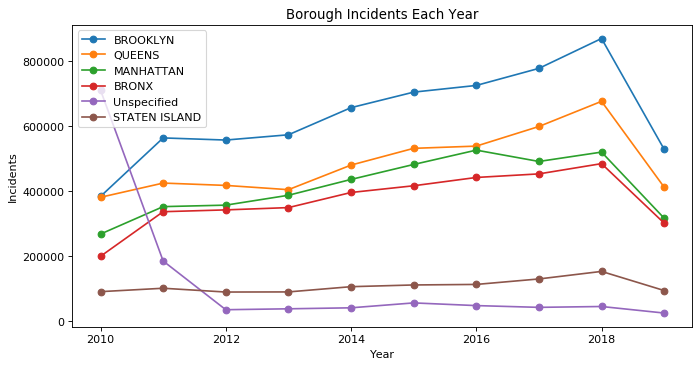

In [143]:
x = np.arange(2010,2020,1)

plt.figure()
plt.subplots(figsize=(10,5), dpi= 80) 

plt.plot(x, service_borough_df['BROOKLYN'], '-o', label='BROOKLYN')
plt.plot(x, service_borough_df['QUEENS'], '-o', label='QUEENS')
plt.plot(x, service_borough_df['MANHATTAN'], '-o', label='MANHATTAN')
plt.plot(x, service_borough_df['BRONX'], '-o', label='BRONX')
plt.plot(x, service_borough_df['Unspecified'], '-o', label='Unspecified')
plt.plot(x, service_borough_df['STATEN ISLAND'], '-o', label='STATEN ISLAND')


# Labels, Title, Legend:
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.title('Borough Incidents Each Year')
plt.legend(loc="upper left")
plt.show()

# Challenge Two: Build a Data Product

In [13]:
service_all_df = service_all_df.fillna(0)

In [14]:
service_all_df['Latitude']=pd.to_numeric(service_all_df['Latitude'], errors='coerce').fillna(0)
service_all_df['Longitude']=pd.to_numeric(service_all_df['Longitude'], errors='coerce').fillna(0)

In [15]:
# service_all_df.to_csv("clean_service_new_col.csv",index=False)

## Read Clean Dataset

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# service_all_df = pd.read_csv('clean_service.csv')
service_all_df = pd.read_csv('clean_service_new_col.csv')

In [5]:
def split(X,y):
    X_train = X[(X.Year>=2015) & (X.Year<=2017)]
    y_train = y[(X.Year>=2015) & (X.Year<=2017)]

    X_test = X[(X.Year==2018) | (X.Year==2019)]
    y_test = y[(X.Year==2018) | (X.Year==2019)]
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    return(X_train,y_train,X_test,y_test)

In [6]:
featurs_col = ['Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
 'Incident Zip', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Borough',
 'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type',
 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction',
 'Road Ramp', 'Bridge Highway Segment', 'Latitude', 'Longitude', 'Year', 'Month', 'Day']

In [7]:
featurs_col = ['Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Location Type', 'Incident Zip', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Address Type', 'City', 'Facility Type', 'Borough',
       'Open Data Channel Type', 'Park Borough', 'Latitude', 'Longitude',
       'Year', 'Month', 'Day', 'Dow']

##  Predict what the type of a given complaint will be

In [7]:
X = service_all_df.sample(frac=0.5,random_state=6,replace=False)

In [8]:
y=X['Complaint Type']

X=X[featurs_col]
X = X.drop(['Complaint Type','Descriptor'],axis=1)

In [9]:
X_train,y_train,X_test,y_test = split(X,y)

(3592756, 24) (3592756,) (2211006, 24) (2211006,)


In [24]:
my_RandomForest = RandomForestClassifier(n_jobs=-1,n_estimators = 10, max_depth=10, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.5269234909358003


## Normalize

In [7]:
X = service_all_df.sample(frac=0.5,random_state=6,replace=False)

In [8]:
y=X['Complaint Type']

X=X[featurs_col]
X = X.drop(['Complaint Type','Descriptor'],axis=1)

In [9]:
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
X_train,y_train,X_test,y_test = split(X,y)

(3592756, 24) (3592756,) (2211006, 24) (2211006,)


In [11]:
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_train.head()

,Agency,Agency Name,Location Type,Incident Zip,Address Type,City,Landmark,Facility Type,Borough,Open Data Channel Type,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Year,Month,Day
0,0.566667,0.042444,0.854545,0.000004,0.6,0.266920,0.0,0.6,0.666667,0.8,...,0.0,0.0,0.0,0.0,0.0,0.996159,0.056129,0.50,0.909091,0.100000
1,0.566667,0.042444,0.854545,0.000004,0.2,0.406084,0.0,0.6,0.666667,0.6,...,0.0,0.0,0.0,0.0,0.0,0.994367,0.056094,0.00,1.000000,0.433333
2,0.733333,0.041158,0.654545,0.000003,0.2,0.093536,0.0,0.6,0.166667,0.8,...,0.0,0.0,0.0,0.0,0.0,0.998933,0.055493,0.25,1.000000,0.133333
3,0.866667,0.063023,0.684848,0.000004,0.2,0.099620,0.0,0.8,0.333333,0.8,...,0.0,0.0,0.0,0.0,0.0,0.993398,0.053245,0.00,1.000000,0.166667
4,0.533333,0.043730,0.000000,0.000003,0.2,0.606084,0.0,0.6,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.996466,0.054070,0.25,0.454545,0.966667


In [12]:
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)
X_test.head()

,Agency,Agency Name,Location Type,Incident Zip,Address Type,City,Landmark,Facility Type,Borough,Open Data Channel Type,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Year,Month,Day
0,0.333333,0.036656,0.000000,0.000003,0.2,0.863118,0.0,0.6,0.833333,1.0,...,0.0,0.000000,0.0,0.0,0.000000,0.990314,0.050818,0.75,0.272727,0.500000
1,0.533333,0.043730,0.000000,0.000004,0.6,0.099620,0.0,0.6,0.333333,1.0,...,0.0,0.000000,0.0,0.0,0.000000,0.993002,0.053254,0.75,0.727273,0.633333
2,0.733333,0.041158,0.654545,0.000004,0.2,0.419772,0.0,0.6,0.666667,0.8,...,0.0,0.000000,0.0,0.0,0.000000,0.996126,0.055135,0.75,1.000000,0.400000
3,0.533333,0.043730,0.387879,0.000003,0.0,0.863118,0.0,0.6,1.000000,0.8,...,0.0,0.776471,1.0,1.0,0.924381,0.992501,0.052558,1.00,0.272727,0.566667
4,0.433333,0.039871,0.042424,0.000003,0.8,0.093536,0.0,0.6,0.166667,0.2,...,0.0,0.000000,0.0,0.0,0.000000,0.998145,0.054494,0.75,0.545455,0.066667


In [13]:
my_RandomForest = RandomForestClassifier(n_estimators = 20, max_depth=30, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.5889264886662451


In [14]:
sorted(zip(my_RandomForest.feature_importances_,X_train.columns), reverse=True)[0:15]

[(0.1893661352613309, 'Location Type'),
 (0.12920884676769243, 'Latitude'),
 (0.12760008615962273, 'Longitude'),
 (0.11241004815007667, 'Agency'),
 (0.10543688805778484, 'Agency Name'),
 (0.07759657456355018, 'Day'),
 (0.05975053552399655, 'Month'),
 (0.05499579762902588, 'Open Data Channel Type'),
 (0.04324264487560694, 'Facility Type'),
 (0.03686150218598287, 'Address Type'),
 (0.016272616476877357, 'City'),
 (0.015669338650059785, 'Year'),
 (0.008073105191857298, 'Borough'),
 (0.007434546281318971, 'Incident Zip'),
 (0.007250645552794556, 'Park Borough')]

### all features

In [7]:
X = service_all_df.sample(frac=0.5,random_state=6,replace=False)
y=X['Complaint Type']

X=X[featurs_col]
X = X.drop(['Complaint Type'],axis=1)

In [8]:
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)
X_train,y_train,X_test,y_test = split(X,y)
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)

(3592756, 25) (3592756,) (2211006, 25) (2211006,)


In [9]:
my_RandomForest = RandomForestClassifier(n_jobs=2,n_estimators = 20, max_depth=30, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.9438599442968495


In [10]:
sorted(zip(my_RandomForest.feature_importances_,X_train.columns), reverse=True)[0:15]

[(0.47292798010251164, 'Descriptor'),
 (0.13822197213871207, 'Location Type'),
 (0.08668323208535703, 'Agency Name'),
 (0.07996030404468499, 'Agency'),
 (0.03741895713134502, 'Open Data Channel Type'),
 (0.03193367638764004, 'Facility Type'),
 (0.030873282101636736, 'Longitude'),
 (0.030540960419388113, 'Latitude'),
 (0.021911374412621424, 'Address Type'),
 (0.01542749762892169, 'Month'),
 (0.014309186991296652, 'Day'),
 (0.007755052915705966, 'City'),
 (0.007156956480905752, 'Park Borough'),
 (0.007146686148820277, 'Incident Zip'),
 (0.005990530477628037, 'Year')]

### Descriptor 

In [17]:
X = service_all_df.sample(frac=0.5,random_state=6,replace=False)
y=X['Complaint Type']

X=X[['Descriptor','Agency','Year']]
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train,y_train,X_test,y_test = split(X,y)
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)

(3592756, 3) (3592756,) (2211006, 3) (2211006,)


In [20]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.9111282375534033


## Locations Features (New Dataset)

In [9]:
X = service_all_df.sample(frac=0.5,random_state=6,replace=False)
y=X['Complaint Type']

X=X[featurs_col]
X = X.drop(['Complaint Type','Descriptor'],axis=1)

In [10]:
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)
X_train,y_train,X_test,y_test = split(X,y)
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)

(3592756, 19) (3592756,) (2211006, 19) (2211006,)


In [11]:
my_RandomForest = RandomForestClassifier(n_estimators = 15, max_depth=25, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.6069599087474209


In [12]:
sorted(zip(my_RandomForest.feature_importances_,X_train.columns), reverse=True)[0:15]

[(0.2104612298707271, 'Location Type'),
 (0.12322932161088382, 'Agency'),
 (0.10270942812763094, 'Agency Name'),
 (0.06855413283948654, 'Open Data Channel Type'),
 (0.06520907290584622, 'Latitude'),
 (0.06503908116881871, 'Longitude'),
 (0.050035543359688094, 'Street Name'),
 (0.04897271883377696, 'Facility Type'),
 (0.04388611361380166, 'Month'),
 (0.03634172304319047, 'Day'),
 (0.03533449510161577, 'Address Type'),
 (0.033906143200131605, 'Cross Street 1'),
 (0.02946932171686809, 'Cross Street 2'),
 (0.024542280737094153, 'Dow'),
 (0.01658345520229708, 'Year')]

# Deeper Analyze

In [68]:
sql = "SELECT complaint_type, COUNT(*) as service_all \
       FROM public.three_one_one \
       GROUP BY complaint_type ORDER BY COUNT(*) DESC;"
service_complaint = test_query_db(sql)
service_complaint.head(20)

,complaint_type,service_all
0,Noise - Residential,1722501
1,HEAT/HOT WATER,1149728
2,Street Condition,939603
3,Street Light Condition,891730
4,HEATING,887869
5,Blocked Driveway,867920
6,Illegal Parking,839945
7,PLUMBING,701818
8,Water System,630164
9,GENERAL CONSTRUCTION,500863


<BarContainer object of 20 artists>

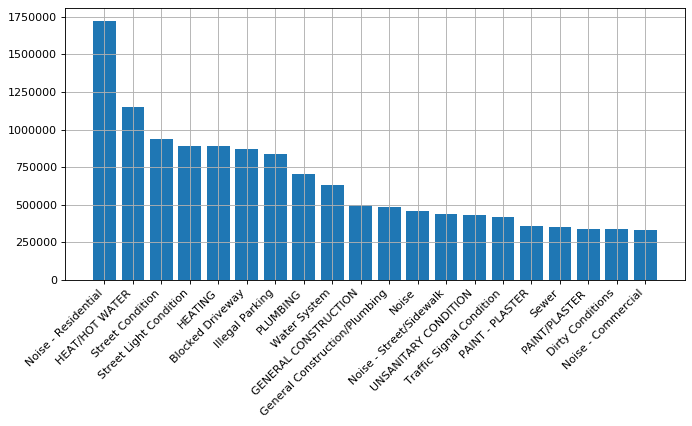

In [49]:
x = service_complaint['complaint_type'].head(20)
y = service_complaint['service_all'].head(20)
fig,ax =plt.subplots(figsize=(10,5), dpi= 80) 
fig.autofmt_xdate(rotation=45)
plt.grid(True)
plt.bar(x,y)

In [50]:
service_complaint = service_complaint.head(20)

In [51]:
for x in range(2010,2020):
    service_complaint = service_complaint.merge(test_query_db("SELECT complaint_type, COUNT(*) as service_%d FROM public.three_one_one \
                                                                 WHERE extract(year FROM created_date)= %d  \
                                                                 GROUP BY complaint_type;" % (x,x)),
                                                  on='complaint_type', how='left')
service_complaint = service_complaint.fillna(0)
service_complaint

,complaint_type,service_all,service_2010,service_2011,service_2012,service_2013,service_2014,service_2015,service_2016,service_2017,service_2018,service_2019
0,Noise - Residential,1722501,115632.0,111447.0,127943.0,151516.0,192608,208026.0,221906.0,230227.0,217917.0,145279.0
1,HEAT/HOT WATER,1149728,0.0,0.0,0.0,0.0,132767,225706.0,227959.0,213521.0,223835.0,125940.0
2,Street Condition,939603,103218.0,104694.0,67135.0,74213.0,114545,124377.0,90419.0,93271.0,104013.0,63718.0
3,Street Light Condition,891730,116466.0,101314.0,93981.0,92502.0,94665,98107.0,89122.0,84195.0,76264.0,45114.0
4,HEATING,887869,214218.0,190184.0,182974.0,202896.0,97597,0.0,0.0,0.0,0.0,0.0
5,Blocked Driveway,867920,49972.0,52592.0,50818.0,57408.0,79170,100881.0,119046.0,136213.0,137198.0,84622.0
6,Illegal Parking,839945,19901.0,34204.0,32037.0,44156.0,63243,92679.0,122479.0,146240.0,163396.0,121610.0
7,PLUMBING,701818,111504.0,113218.0,87561.0,86564.0,63221,55418.0,52592.0,49969.0,53359.0,28412.0
8,Water System,630164,70195.0,61578.0,57676.0,53187.0,55884,71079.0,73319.0,65097.0,76278.0,45871.0
9,GENERAL CONSTRUCTION,500863,127131.0,133242.0,112436.0,112169.0,15885,0.0,0.0,0.0,0.0,0.0


In [52]:
def all_year_chart(df,col):
    col_list = df[col].values
    df = pd.DataFrame(data = np.array(df.T), columns=col_list)
    df = df.drop([0,1],axis=0)
    df = df.set_index(np.arange(2010,2020))
    return df

In [54]:
service_complaint = all_year_chart(service_complaint,'complaint_type')
service_complaint

,Noise - Residential,HEAT/HOT WATER,Street Condition,Street Light Condition,HEATING,Blocked Driveway,Illegal Parking,PLUMBING,Water System,GENERAL CONSTRUCTION,General Construction/Plumbing,Noise,Noise - Street/Sidewalk,UNSANITARY CONDITION,Traffic Signal Condition,PAINT - PLASTER,Sewer,PAINT/PLASTER,Dirty Conditions,Noise - Commercial
2010,115632,0,103218,116466,214218,49972,19901,111504,70195,127131,53774,29862,18111,0,53773,93194,43693,0,35457,20899
2011,111447,0,104694,101314,190184,52592,34204,113218,61578,133242,48964,32041,17439,0,47165,100704,46282,0,36926,18338
2012,127943,0,67135,93981,182974,50818,32037,87561,57676,112436,46201,34178,19433,0,47778,77287,36955,1,33661,20599
2013,151516,0,74213,92502,202896,57408,44156,86564,53187,112169,43778,39250,24609,0,44739,77957,31439,891,33227,26520
2014,192608,132767,114545,94665,97597,79170,63243,63221,55884,15885,47848,51176,35484,61789,42489,12116,36512,63503,32630,37325
2015,208026,225706,124377,98107,0,100881,92679,55418,71079,0,50483,57365,51692,82888,42309,0,31898,69698,34398,44109
2016,221906,227959,90419,89122,0,119046,122479,52592,73319,0,53963,58493,61199,80469,37527,0,32650,60336,33942,49006
2017,230227,213521,93271,84195,0,136213,146240,49969,65097,0,52649,60171,73116,79282,36178,0,32526,57076,35887,47420
2018,217917,223835,104013,76264,0,137198,163396,53359,76278,0,52625,60699,74168,86480,42695,0,37744,59570,39022,44760
2019,145279,125940,63718,45114,0,84622,121610,28412,45871,0,32330,37912,64606,43356,26023,0,21747,29499,22355,26368


<Figure size 432x288 with 0 Axes>

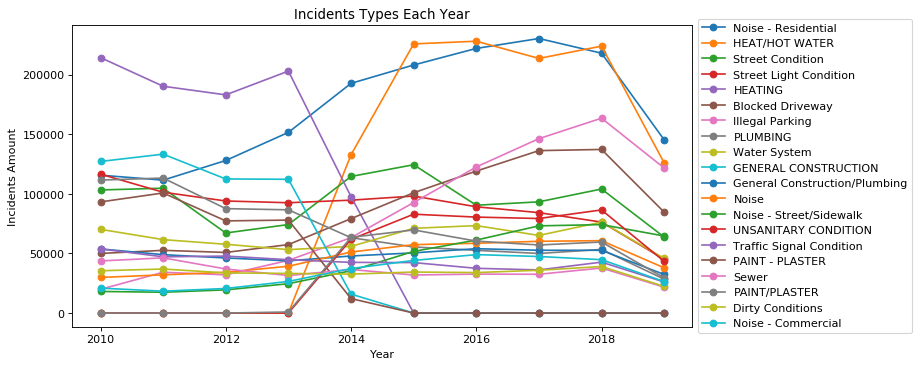

In [58]:
x = np.arange(2010,2020,1)

plt.figure()
plt.subplots(figsize=(10,5), dpi= 80) 

for col in service_complaint.columns:
    plt.plot(x, service_complaint[col], '-o', label=col)


# Labels, Title, Legend:
plt.xlabel('Year')
plt.ylabel('Incidents Amount')
plt.title('Incidents Types Each Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [64]:
sql = "SELECT complaint_type, count(*) as noise_amount \
       FROM public.three_one_one \
       WHERE complaint_type LIKE '%Noise%' \
       GROUP BY complaint_type ORDER BY noise_amount DESC;"
service_noise = test_query_db(sql)
service_noise

,complaint_type,noise_amount
0,Noise - Residential,1722501
1,Noise,461147
2,Noise - Street/Sidewalk,439857
3,Noise - Commercial,335344
4,Noise - Vehicle,201640
5,Noise - Park,34149
6,Noise Survey,16303
7,Noise - Helicopter,10265
8,Noise - House of Worship,9450
9,Collection Truck Noise,1706


<BarContainer object of 10 artists>

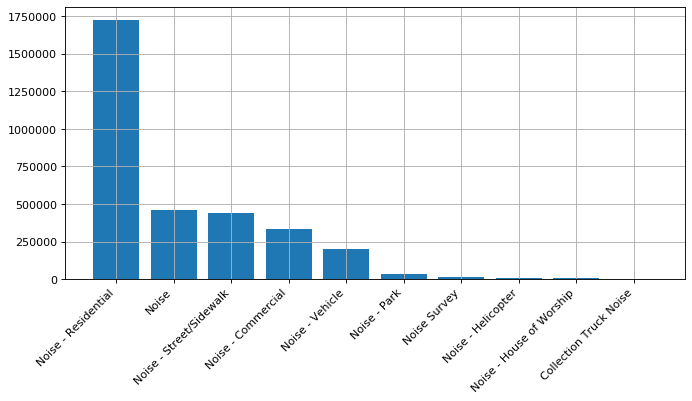

In [65]:
x = service_noise['complaint_type']
y = service_noise['noise_amount']
fig,ax =plt.subplots(figsize=(10,5), dpi= 80) 
fig.autofmt_xdate(rotation=45)
plt.grid(True)
plt.bar(x,y)

In [66]:
sum(service_noise['noise_amount'])

3232362

<BarContainer object of 20 artists>

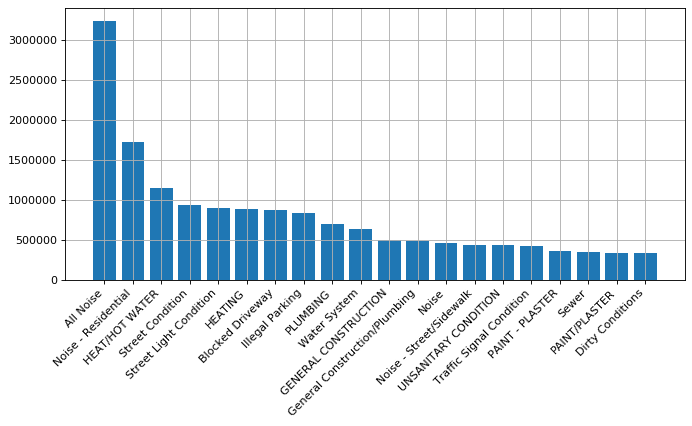

In [73]:
service_complaint.loc[-1] = ['All Noise', 3232362]
service_complaint.index = service_complaint.index + 1  # shifting index
service_complaint = service_complaint.sort_index()  # sorting by index

x = service_complaint['complaint_type'].head(20)
y = service_complaint['service_all'].head(20)
fig,ax =plt.subplots(figsize=(10,5), dpi= 80) 
fig.autofmt_xdate(rotation=45)
plt.grid(True)
plt.bar(x,y)

### Now we know Noise is the No.1 problem to NY residents.

In [74]:
sql = "SELECT agency, agency_name, complaint_type \
       FROM public.three_one_one \
       WHERE complaint_type LIKE '%Noise%';"
service_noise = test_query_db(sql)
service_noise

,agency,agency_name,complaint_type
0,NYPD,New York City Police Department,Noise - Residential
1,NYPD,New York City Police Department,Noise - Street/Sidewalk
2,DEP,Department of Environmental Protection,Noise
3,NYPD,New York City Police Department,Noise - Residential
4,NYPD,New York City Police Department,Noise - Commercial
5,NYPD,New York City Police Department,Noise - Residential
6,NYPD,New York City Police Department,Noise - Residential
7,NYPD,New York City Police Department,Noise - Residential
8,NYPD,New York City Police Department,Noise - Street/Sidewalk
9,NYPD,New York City Police Department,Noise - Residential


In [21]:
print(service_all_df['Agency Name'].nunique())
print(service_all_df['Agency'].nunique())

1556
31


In [75]:
service_noise['agency'].value_counts()

NYPD     2742942
DEP       461147
3-1-1      16302
EDC        10264
DSNY        1706
DPR            1
Name: agency, dtype: int64

In [78]:
temp = service_noise[service_noise.agency=='NYPD']
temp['complaint_type'].value_counts()

Noise - Residential         1722501
Noise - Street/Sidewalk      439856
Noise - Commercial           335344
Noise - Vehicle              201640
Noise - Park                  34149
Noise - House of Worship       9450
Noise Survey                      2
Name: complaint_type, dtype: int64

In [79]:
temp = service_noise[service_noise.complaint_type.isin(temp['complaint_type'])]
temp['agency'].value_counts()

NYPD     2742942
3-1-1      16301
DPR            1
Name: agency, dtype: int64

## Conclusion: 
1. Most of the noise report about neighborhood are reported to NYPD, but not all of them is reported to NYPD. An AI Prediction to the right agency can save lots of man power.
2. In order to solve noise problem, prediction model for where might have noise problem let policeman could patrol there more often

# Predict Agency (Classification)

In [30]:
X = service_all_df.sample(frac=0.5,random_state=6,replace=False)
y=X['Agency']

X=X[featurs_col]
X = X.drop(['Agency','Agency Name'],axis=1)

In [31]:
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)
X_train,y_train,X_test,y_test = split(X,y)
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)

(3592756, 19) (3592756,) (2211006, 19) (2211006,)


In [10]:
my_RandomForest = RandomForestClassifier(n_jobs=-1,n_estimators = 20, max_depth=30, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.9482194982736365


In [11]:
my_RandomForest = RandomForestClassifier(n_jobs=-1,n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.9587282892945564


## New Dataset

In [32]:
my_RandomForest = RandomForestClassifier(n_jobs=-1,n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.9697341391203823


# Predict Agency Name (Classification) 

In [8]:
X = service_all_df.sample(frac=0.5,random_state=6,replace=False)
y=X['Agency Name']

X=X[featurs_col]
X = X.drop(['Agency','Agency Name'],axis=1)

In [9]:
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)
X_train,y_train,X_test,y_test = split(X,y)
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)

(3592756, 19) (3592756,) (2211006, 19) (2211006,)


In [9]:
my_RandomForest = RandomForestClassifier(n_estimators = 10, max_depth=15, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.9399879511860212


## New Dataset 

In [10]:
my_RandomForest = RandomForestClassifier(n_estimators = 15, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)
my_RandomForest_score = accuracy_score(y_test,my_RandomForest_predict)

print("Accuracy:", my_RandomForest_score)

Accuracy: 0.9485302165620536


In [11]:
sorted(zip(my_RandomForest.feature_importances_,X_train.columns), reverse=True)

[(0.2108567526026963, 'Location Type'),
 (0.19773160081540897, 'Facility Type'),
 (0.13818759528418162, 'Complaint Type'),
 (0.11186456000580566, 'Open Data Channel Type'),
 (0.07942822900859908, 'Descriptor'),
 (0.0513023031245564, 'Cross Street 1'),
 (0.03816227234254798, 'Street Name'),
 (0.03699868231334307, 'Cross Street 2'),
 (0.030960535552402222, 'Address Type'),
 (0.026944029205886268, 'Latitude'),
 (0.020026510455520993, 'Longitude'),
 (0.012303557915355931, 'Month'),
 (0.010647755971671419, 'Incident Zip'),
 (0.008922823802624593, 'Park Borough'),
 (0.00875036120649105, 'City'),
 (0.007451816374445643, 'Borough'),
 (0.006758435052094702, 'Year'),
 (0.001509962241557835, 'Day'),
 (0.001192216724810252, 'Dow')]

In [20]:
service_all_df.corr()

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Street Name,Cross Street 1,Cross Street 2,...,Facility Type,Borough,Open Data Channel Type,Park Borough,Latitude,Longitude,Year,Month,Day,Dow
Unique Key,1.000000,-0.016755,-0.000755,-0.016124,-0.006550,0.017602,-0.000394,0.030062,0.003376,0.001389,...,-0.265731,0.005075,-0.021231,0.005075,0.011377,-0.011566,0.954622,0.063377,0.008864,0.002055
Agency,-0.016755,1.000000,0.196386,-0.123607,-0.051472,0.682675,-0.001171,0.120935,0.057060,0.050522,...,0.343113,-0.100033,-0.320855,-0.100033,0.194782,-0.193951,0.015623,0.015191,-0.002458,-0.001817
Agency Name,-0.000755,0.196386,1.000000,0.055560,-0.032482,0.011675,-0.000030,-0.049044,0.011937,0.008910,...,-0.003516,0.026352,-0.117242,0.026352,-0.058794,0.058816,0.002327,0.008189,-0.000252,0.002972
Complaint Type,-0.016124,-0.123607,0.055560,1.000000,0.141902,-0.228608,-0.000908,-0.023092,0.061840,0.074594,...,-0.087209,-0.043419,0.073759,-0.043419,0.062869,-0.063010,0.000754,-0.003699,0.002768,-0.001747
Descriptor,-0.006550,-0.051472,-0.032482,0.141902,1.000000,-0.152109,-0.000545,-0.066479,0.028566,0.044188,...,0.085256,0.062697,0.109420,0.062697,-0.050067,0.049843,0.010809,0.007646,0.003586,-0.001943
Location Type,0.017602,0.682675,0.011675,-0.228608,-0.152109,1.000000,-0.000362,0.110090,0.114006,0.087941,...,0.196384,-0.066811,-0.364162,-0.066811,0.231848,-0.231587,0.051968,0.027567,0.001703,-0.000470
Incident Zip,-0.000394,-0.001171,-0.000030,-0.000908,-0.000545,-0.000362,1.000000,0.000520,-0.000236,-0.000222,...,0.000056,0.001206,-0.000420,0.001206,-0.000210,0.000209,-0.000360,0.000358,0.000293,0.000249
Street Name,0.030062,0.120935,-0.049044,-0.023092,-0.066479,0.110090,0.000520,1.000000,0.217667,0.220146,...,0.019434,-0.250552,-0.127870,-0.250552,0.255269,-0.254797,0.024036,-0.000754,0.000293,0.002637
Cross Street 1,0.003376,0.057060,0.011937,0.061840,0.028566,0.114006,-0.000236,0.217667,1.000000,0.675566,...,0.099979,-0.075440,-0.175598,-0.075440,0.154023,-0.154514,0.021580,-0.011921,0.001652,0.009173
Cross Street 2,0.001389,0.050522,0.008910,0.074594,0.044188,0.087941,-0.000222,0.220146,0.675566,1.000000,...,0.090479,-0.074466,-0.155078,-0.074466,0.157665,-0.158083,0.019564,-0.013673,0.001592,0.008661


# Predict Noise

## analyze columns

In [10]:
sql = "SELECT unique_key, agency, agency_name, complaint_type, descriptor, location_type, incident_zip, street_name, cross_street_1, cross_street_2, address_type, city, facility_type, borough, open_data_channel_type, park_borough, latitude, longitude, \
       EXTRACT(YEAR FROM created_date) as Year, EXTRACT(Month FROM created_date) as Month, EXTRACT(Day FROM created_date) as Day, EXTRACT(Dow FROM created_date) as Dow \
       FROM public.three_one_one \
       WHERE complaint_type LIKE '%Noise%' and agency='NYPD' and EXTRACT(year FROM created_date) = 2018;"
service_noise = test_query_db(sql)
service_noise

,unique_key,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,street_name,cross_street_1,cross_street_2,...,facility_type,borough,open_data_channel_type,park_borough,latitude,longitude,year,month,day,dow
0,38067938,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,11222.0,GREENPOINT AVENUE,WEST STREET,FRANKLIN STREET,...,Precinct,BROOKLYN,MOBILE,BROOKLYN,40.729796948451764,-73.95838458100494,2018,1,1,1
1,38071606,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11355.0,COLDEN STREET,45 AVENUE,GERANIUM AVENUE,...,Precinct,QUEENS,ONLINE,QUEENS,40.750501141088380,-73.82300178904647,2018,1,1,1
2,38066298,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10033.0,OVERLOOK TERRACE,WEST 184 STREET,WEST 186 STREET,...,Precinct,MANHATTAN,PHONE,MANHATTAN,40.853398594394640,-73.93639089586466,2018,1,1,1
3,38067145,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10456.0,,,,...,Precinct,BRONX,PHONE,BRONX,40.822714297692540,-73.90313992430696,2018,1,1,1
4,38067908,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10033.0,AUDUBON AVENUE,WEST 175 STREET,WEST 176 STREET,...,Precinct,MANHATTAN,MOBILE,MANHATTAN,40.845366691317004,-73.93478658323296,2018,1,1,1
5,38068777,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11429.0,212 STREET,99 AVENUE,102 AVENUE,...,Precinct,QUEENS,ONLINE,QUEENS,40.713998700247245,-73.74669779263606,2018,1,1,1
6,38066461,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11106.0,34 STREET,36 AVENUE,37 AVENUE,...,Precinct,QUEENS,PHONE,QUEENS,40.754410732266955,-73.92818741282252,2018,1,1,1
7,38067979,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10040.0,WEST 192 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,...,Precinct,MANHATTAN,ONLINE,MANHATTAN,40.856237711700690,-73.92886552195142,2018,1,1,1
8,38069534,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10010.0,EAST 21 STREET,3 AVENUE,2 AVENUE,...,Precinct,MANHATTAN,ONLINE,MANHATTAN,40.737384328147535,-73.98371855849090,2018,1,1,1
9,38066463,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10039.0,FREDERICK DOUGLASS BOULEVARD,MACOMBS DAM BRIDGE,HARLEM RIVER DRIVE,...,Precinct,MANHATTAN,ONLINE,MANHATTAN,40.830362260625506,-73.93640207830494,2018,1,1,1


In [16]:
service_noise.isna().sum()

unique_key                   0
agency                       0
agency_name                  0
complaint_type               0
descriptor                   0
location_type                0
incident_zip               524
street_name                  0
cross_street_1               0
cross_street_2               0
address_type                 0
city                         0
facility_type                0
borough                      0
open_data_channel_type       0
park_borough                 0
latitude                  1218
longitude                 1218
year                         0
month                        0
day                          0
dow                          0
dtype: int64

In [17]:
service_noise[service_noise.incident_zip.isna()]

,unique_key,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,street_name,cross_street_1,cross_street_2,...,facility_type,borough,open_data_channel_type,park_borough,latitude,longitude,year,month,day,dow
792,38093261,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,NaN,SOUTH 4 STREET,,,...,N/A,Unspecified,MOBILE,Unspecified,None,None,2018,1,2,2
1587,38115517,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,MADISON STREET,,,...,N/A,Unspecified,MOBILE,Unspecified,None,None,2018,1,5,5
2162,38128742,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,CHAUNCEY STREET,,,...,N/A,Unspecified,MOBILE,Unspecified,None,None,2018,1,7,0
3385,38171303,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,95 AVENUE,97 STREET,,...,Precinct,Unspecified,ONLINE,Unspecified,None,None,2018,1,10,3
3472,38176642,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,WALL STREET,ST MARKS PLACE,,...,Precinct,Unspecified,ONLINE,Unspecified,None,None,2018,1,10,3
3618,38077557,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,NaN,SHERMAN AVENUE,,,...,N/A,Unspecified,ONLINE,Unspecified,None,None,2018,1,1,1
4419,38104235,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,NaN,FRANKLIN AVENUE,FILLMORE STREET,,...,Precinct,Unspecified,ONLINE,Unspecified,None,None,2018,1,3,3
5827,38220777,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,BECK STREET,,,...,Precinct,Unspecified,ONLINE,Unspecified,None,None,2018,1,15,1
5885,38129770,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,40 ROAD,JUNCTION BOULEVARD,,...,N/A,Unspecified,ONLINE,Unspecified,None,None,2018,1,6,6
6126,38218790,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,107 STREET,LIBERTY AVENUE,,...,Precinct,Unspecified,ONLINE,Unspecified,None,None,2018,1,15,1


In [15]:
service_noise.nunique()

unique_key                375803
agency                         1
agency_name                    2
complaint_type                 6
descriptor                     7
location_type                  6
incident_zip                 210
street_name                 5471
cross_street_1              4865
cross_street_2              4844
address_type                   6
city                          49
facility_type                  3
borough                        6
open_data_channel_type         4
park_borough                   6
latitude                   92086
longitude                  92086
year                           1
month                         12
day                           31
dow                            7
dtype: int64

## Preprocessing Dataset

In [14]:
sql = "SELECT unique_key, descriptor, location_type, incident_zip, address_type, city, facility_type, borough, open_data_channel_type, park_borough, latitude, longitude, \
       EXTRACT(YEAR FROM created_date) as Year, EXTRACT(Month FROM created_date) as Month, EXTRACT(Day FROM created_date) as Day, EXTRACT(Dow FROM created_date) as Dow \
       FROM public.three_one_one \
       WHERE complaint_type LIKE '%Noise%' and agency='NYPD' and EXTRACT(year FROM created_date) BETWEEN 2015 and 2019;"
service_noise = test_query_db(sql)
service_noise

,unique_key,descriptor,location_type,incident_zip,address_type,city,facility_type,borough,open_data_channel_type,park_borough,latitude,longitude,year,month,day,dow
0,29611577,Loud Music/Party,Residential Building/House,11375.0,ADDRESS,FOREST HILLS,Precinct,QUEENS,PHONE,QUEENS,40.709232220566700,-73.85320421888265,2015,1,1,4
1,29612402,Loud Music/Party,Residential Building/House,10031.0,ADDRESS,NEW YORK,Precinct,MANHATTAN,ONLINE,MANHATTAN,40.828504184450520,-73.94749704707705,2015,1,1,4
2,29609170,Loud Music/Party,Residential Building/House,10468.0,ADDRESS,BRONX,Precinct,BRONX,PHONE,BRONX,40.858406041705030,-73.89938613893433,2015,1,1,4
3,29608227,Loud Music/Party,Residential Building/House,11364.0,ADDRESS,OAKLAND GARDENS,Precinct,QUEENS,PHONE,QUEENS,40.737044658287690,-73.76257044930473,2015,1,1,4
4,29607587,Loud Talking,Residential Building/House,10468.0,ADDRESS,BRONX,Precinct,BRONX,PHONE,BRONX,40.858406041705030,-73.89938613893433,2015,1,1,4
5,29613244,Loud Music/Party,Residential Building/House,11416.0,ADDRESS,OZONE PARK,Precinct,QUEENS,PHONE,QUEENS,40.686567651102365,-73.84409916325602,2015,1,1,4
6,29609131,Loud Music/Party,Club/Bar/Restaurant,11103.0,ADDRESS,ASTORIA,Precinct,QUEENS,ONLINE,QUEENS,40.757298558540120,-73.92037322099308,2015,1,1,4
7,29608271,Loud Music/Party,Residential Building/House,10034.0,ADDRESS,NEW YORK,Precinct,MANHATTAN,PHONE,MANHATTAN,40.868826668021410,-73.92306346438063,2015,1,1,4
8,29612458,Loud Music/Party,Residential Building/House,10468.0,ADDRESS,BRONX,Precinct,BRONX,PHONE,BRONX,40.871765254458710,-73.88828358796718,2015,1,1,4
9,29609205,Loud Music/Party,Residential Building/House,11691.0,ADDRESS,FAR ROCKAWAY,Precinct,QUEENS,ONLINE,QUEENS,40.600357534518560,-73.74860536859191,2015,1,1,4


In [16]:
def lat_long_float(df):
    df['latitude']=pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude']=pd.to_numeric(df['longitude'], errors='coerce')
    return df

In [17]:
service_noise = lat_long_float(service_noise)
service_noise = service_noise.dropna()

In [21]:
service_noise.corr()

,unique_key,incident_zip,latitude,longitude,year,month,day,dow
unique_key,1.000000,0.016242,0.017106,0.033112,0.981258,0.034292,-0.002187,-0.002558
incident_zip,0.016242,1.000000,-0.623296,0.368553,0.012113,0.019027,-0.000628,-0.026172
latitude,0.017106,-0.623296,1.000000,0.272450,0.019709,-0.015527,0.002392,-0.001762
longitude,0.033112,0.368553,0.272450,1.000000,0.030117,0.010136,0.000692,-0.033721
year,0.981258,0.012113,0.019709,0.030117,1.000000,-0.152106,-0.015451,-0.004267
month,0.034292,0.019027,-0.015527,0.010136,-0.152106,1.000000,-0.021222,0.006727
day,-0.002187,-0.000628,0.002392,0.000692,-0.015451,-0.021222,1.000000,-0.002238
dow,-0.002558,-0.026172,-0.001762,-0.033721,-0.004267,0.006727,-0.002238,1.000000


In [95]:
featurs_col = ['descriptor','location_type', 'incident_zip', 'address_type', 'city',
       'facility_type', 'borough', 'open_data_channel_type', 'park_borough',
       'year', 'month', 'day', 'dow']

In [96]:
label_encoder_cols =['descriptor','location_type', 'address_type', 'city',
       'facility_type', 'borough', 'open_data_channel_type', 'park_borough']

## RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [98]:
X = service_noise[featurs_col]
y = service_noise[['latitude','longitude']]

In [99]:
le = preprocessing.LabelEncoder()
# le.fit(np.unique(service_all_df[label_encoder_cols].values))
X[label_encoder_cols]=X[label_encoder_cols].apply(le.fit_transform)
X.head()

C:\Users\Daniel Chang\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,descriptor,location_type,incident_zip,address_type,city,facility_type,borough,open_data_channel_type,park_borough,year,month,day,dow
0,4,6,10002.0,3,35,2,2,2,2,2015,1,1,4
1,4,4,11216.0,1,8,2,1,1,1,2015,1,1,4
2,4,4,11226.0,1,8,2,1,1,1,2015,1,1,4
3,4,4,11215.0,1,8,2,1,1,1,2015,1,1,4
4,4,4,11201.0,1,8,2,1,2,1,2015,1,1,4


In [100]:
X = X.rename(columns={"year": "Year"})

In [101]:
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)
X_train,y_train,X_test,y_test = split(X,y)
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)

(1067880, 13) (1067880, 2) (640402, 13) (640402, 2)


In [103]:
my_RandomForest = RandomForestRegressor(n_estimators = 29, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)

print('latitude MSE: ',mean_squared_error(y_test['latitude'],my_RandomForest_predict[:,0]))
print('longitude MSE: ',mean_squared_error(y_test['longitude'],my_RandomForest_predict[:,1]))

latitude MSE:  2.9599893578679542e-05
longitude MSE:  4.456086621245189e-05


<function matplotlib.pyplot.show(*args, **kw)>

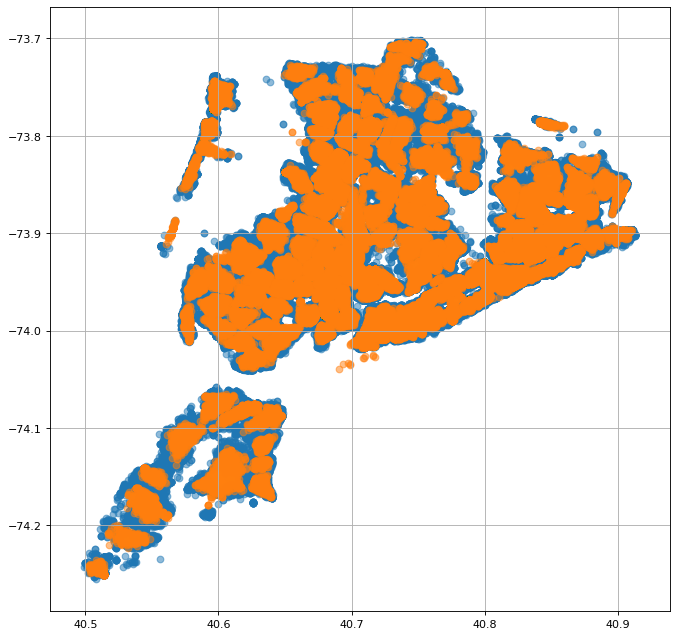

In [105]:
fig,ax =plt.subplots(figsize=(10,10), dpi= 80) 
plt.grid(True)
plt.scatter(y_test['latitude'], y_test['longitude'], alpha=.5)
plt.scatter(my_RandomForest_predict[:,0], my_RandomForest_predict[:,1], alpha=.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

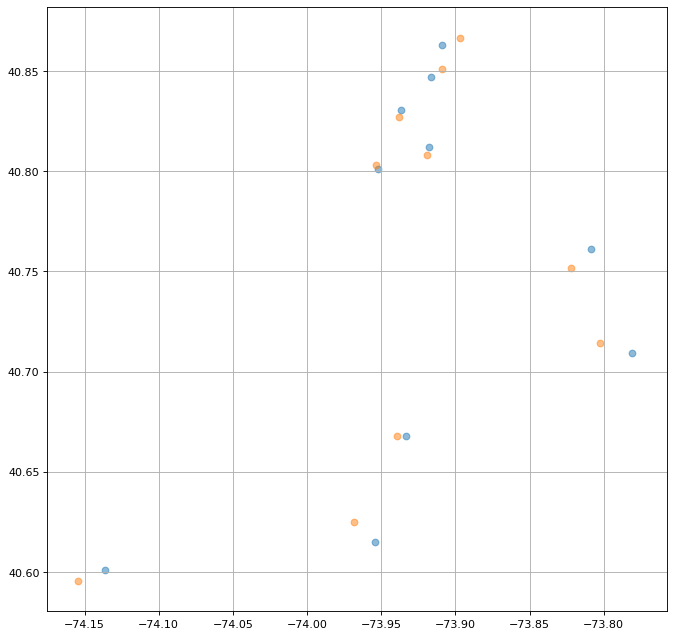

In [116]:
fig,ax =plt.subplots(figsize=(10,10), dpi= 80) 
plt.grid(True)

plt.scatter(y_test['longitude'].head(10), y_test['latitude'].head(10), alpha=.5)
plt.scatter(my_RandomForest_predict[0:10,1], my_RandomForest_predict[0:10,0], alpha=.5)
plt.show

In [106]:
sorted(zip(my_RandomForest.feature_importances_,X_train.columns), reverse=True)

[(0.7810628551437763, 'incident_zip'),
 (0.12360970300453045, 'park_borough'),
 (0.08918801694060487, 'borough'),
 (0.0014620520462926081, 'city'),
 (0.0013633047166388905, 'day'),
 (0.0009110977894498812, 'month'),
 (0.0006813297425512165, 'dow'),
 (0.0004090054838705586, 'descriptor'),
 (0.00039750002084633525, 'Year'),
 (0.0003752028362450286, 'location_type'),
 (0.00034410750181299406, 'open_data_channel_type'),
 (0.0001953218223326834, 'address_type'),
 (5.029510481118859e-07, 'facility_type')]

## Less Features 

In [122]:
service_noise[~(service_noise['borough'] == service_noise['park_borough'])].shape

(0, 16)

In [125]:
featurs_col = ['incident_zip', 'city', 'borough',
               'year', 'month', 'day', 'dow']

In [128]:
label_encoder_cols =['city', 'borough']

In [126]:
X = service_noise[featurs_col]
y = service_noise[['latitude','longitude']]

In [129]:
le = preprocessing.LabelEncoder()
# le.fit(np.unique(service_all_df[label_encoder_cols].values))
X[label_encoder_cols]=X[label_encoder_cols].apply(le.fit_transform)
X = X.rename(columns={"year": "Year"})

C:\Users\Daniel Chang\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [130]:
scalerX = MinMaxScaler(feature_range = (0, 1))
scalerX.fit(X)
X_train,y_train,X_test,y_test = split(X,y)
X_train = pd.DataFrame(data = scalerX.transform(X_train), columns = X_train.columns.values)
X_test = pd.DataFrame(data = scalerX.transform(X_test), columns = X_test.columns.values)

(1067880, 7) (1067880, 2) (640402, 7) (640402, 2)


In [131]:
my_RandomForest = RandomForestRegressor(n_estimators = 29, random_state=2)
my_RandomForest.fit(X_train,y_train)
my_RandomForest_predict = my_RandomForest.predict(X_test)

print('latitude MSE: ',mean_squared_error(y_test['latitude'],my_RandomForest_predict[:,0]))
print('longitude MSE: ',mean_squared_error(y_test['longitude'],my_RandomForest_predict[:,1]))

latitude MSE:  2.9305050326643794e-05
longitude MSE:  4.397483830876789e-05


<function matplotlib.pyplot.show(*args, **kw)>

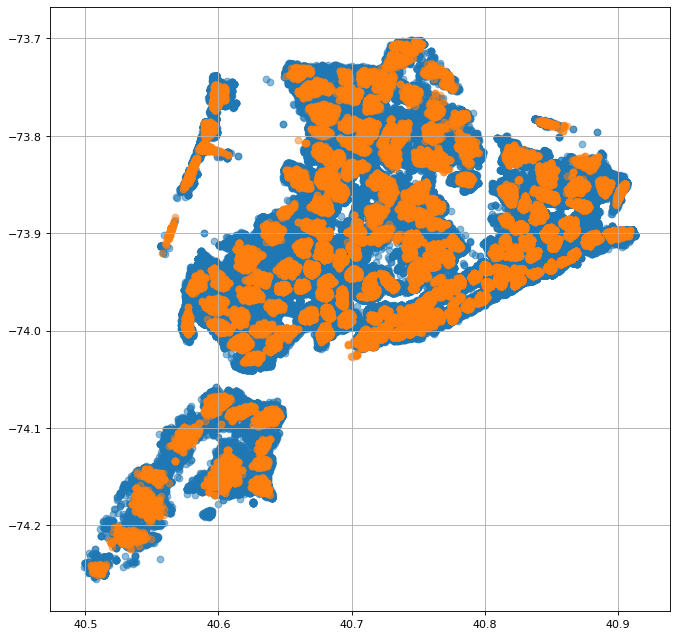

In [132]:
fig,ax =plt.subplots(figsize=(10,10), dpi= 80) 
plt.grid(True)
plt.scatter(y_test['latitude'], y_test['longitude'], alpha=.5)
plt.scatter(my_RandomForest_predict[:,0], my_RandomForest_predict[:,1], alpha=.5)
plt.show